In [1]:
import numpy as np

In [2]:
from IPython.display import clear_output

## Data

In [3]:
import pandas as pd

In [56]:
train_data=pd.read_csv("train.tsv",sep="\t")

In [57]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
train_data.Sentiment.unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [7]:
train_data[train_data.Sentiment==0].head()

,PhraseId,SentenceId,Phrase,Sentiment
101,102,3,would have a hard time sitting through this one,0
103,104,3,have a hard time sitting through this one,0
157,158,5,Aggressive self-glorification and a manipulati...,0
159,160,5,self-glorification and a manipulative whitewash,0
201,202,7,Trouble Every Day is a plodding mess .,0


In [58]:
train_data=train_data.drop(["PhraseId","SentenceId"],axis=1)

In [59]:
train_data.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [36]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

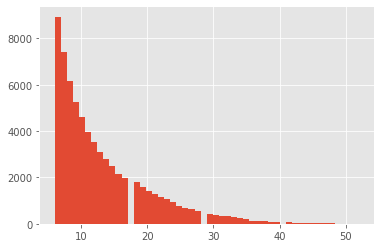

In [37]:
plt.hist([len(s.split(" ")) for s in train_data.Phrase.values if len(s.split(" "))>5], bins=50)
plt.show()

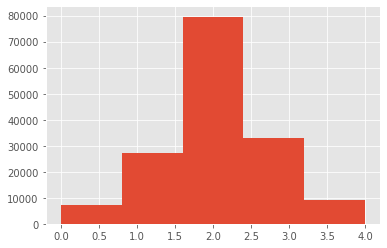

In [39]:
plt.hist([s for s in train_data.Sentiment.values ], bins=5)
plt.show()

In [60]:
train_data=train_data.drop([
    i for i in range(0,len(train_data)) if len(train_data.iloc[i].Phrase.split(" "))<3 and train_data.iloc[i].Sentiment==2
])

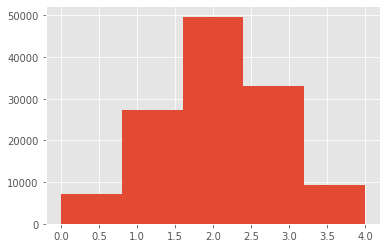

In [61]:
plt.hist([s for s in train_data.Sentiment.values ], bins=5)
plt.show()

that's a bit better

In [103]:
corpus=[]
for row in train_data.Phrase:
    wrds = nltk.word_tokenize(row)
    corpus.extend(wrds)
print(len(corpus))
corpus = [stemmer.stem(w.lower()) for w in corpus]
print(len(corpus))
corpus=list(set(corpus))
print(len(corpus))
corpus=sorted(corpus)

1077139
1077139
10416


In [105]:
sentences =[]
for sentence in train_data.Phrase:
    words = nltk.word_tokenize(sentence)
    words = [stemmer.stem(w.lower()) for w in words]
    sentences.append(words)
print(len(sentences))   
print(sentences[0])

126131
['a', 'sery', 'of', 'escapad', 'demonst', 'the', 'ad', 'that', 'what', 'is', 'good', 'for', 'the', 'goos', 'is', 'also', 'good', 'for', 'the', 'gand', ',', 'som', 'of', 'which', 'occas', 'amus', 'but', 'non', 'of', 'which', 'amount', 'to', 'much', 'of', 'a', 'story', '.']


In [106]:
word2idx = {w: i for i, w in enumerate(corpus)}

In [107]:
word2idx["a"]

231

In [108]:
corpus[-1]

'PADword'

In [109]:
training2 = [[word2idx[w] for w in s] for s in sentences]
print(training2[1])

[231, 7973, 6249, 3021, 2383, 9112, 326, 9110, 10125, 4757, 3787, 3438, 9112, 3805]


In [110]:
max_len=35
n_words = len(corpus)

In [111]:
from keras.preprocessing.sequence import pad_sequences
training2 = pad_sequences(maxlen=max_len, sequences=training2, padding="post", value=n_words - 1)

In [112]:
training2[1]

array([  231,  7973,  6249,  3021,  2383,  9112,   326,  9110, 10125,
        4757,  3787,  3438,  9112,  3805, 10416, 10416, 10416, 10416,
       10416, 10416, 10416, 10416, 10416, 10416, 10416, 10416, 10416,
       10416, 10416, 10416, 10416, 10416, 10416, 10416, 10416])

In [82]:
labels[0]

array([0, 1, 0, 0, 0], dtype=int8)

In [83]:
labels[1]

array([0, 0, 1, 0, 0], dtype=int8)

### version 1 bag of words and simple NN

In [10]:
import nltk

C:\Users\newgh\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\newgh\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [11]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

In [13]:
def bag_of_words(sentence):
    bag=np.zeros(shape=(len(corpus),),dtype=np.int8)
    words= nltk.word_tokenize(row)
    words = [stemmer.stem(w.lower()) for w in words]
    for w in words:
        bag[corpus.index(w)]=bag[corpus.index(w)]+1
    return bag

In [14]:
num_records=len(train_data)
num_percentiles = 100
key_rows=[]
for i in range(0,num_percentiles):
    key_row= (int)(num_records/num_percentiles * i)
    key_rows.append(key_row)
print(key_rows)

[0, 1560, 3121, 4681, 6242, 7803, 9363, 10924, 12484, 14045, 15606, 17166, 18727, 20287, 21848, 23409, 24969, 26530, 28090, 29651, 31212, 32772, 34333, 35893, 37454, 39015, 40575, 42136, 43696, 45257, 46818, 48378, 49939, 51499, 53060, 54621, 56181, 57742, 59302, 60863, 62424, 63984, 65545, 67105, 68666, 70227, 71787, 73348, 74908, 76469, 78030, 79590, 81151, 82711, 84272, 85833, 87393, 88954, 90514, 92075, 93636, 95196, 96757, 98317, 99878, 101439, 102999, 104560, 106120, 107681, 109242, 110802, 112363, 113923, 115484, 117045, 118605, 120166, 121726, 123287, 124848, 126408, 127969, 129529, 131090, 132651, 134211, 135772, 137332, 138893, 140454, 142014, 143575, 145135, 146696, 148257, 149817, 151378, 152938, 154499]


In [15]:
training=[]
i=0
print("started")
for phrase in train_data.Phrase :
    if i in key_rows:
        clear_output(wait=True)
        print(key_rows.index(i),'% completed',end="")
    bag = bag_of_words(phrase)
    training.append(bag)
    i=i+1
print("done")

99 % completeddone


In [16]:
print(len(training))
print(len(training[0]))

156060
10446


In [17]:
labels=[]
for s in train_data.Sentiment:
    output=np.zeros((5,),dtype=np.int8)
    output[s]=1
    labels.append(output)

In [18]:
print(len(labels))
print(len(labels[0]))

156060
5


In [19]:
training = np.array(training)
labels= np.array(labels)

### split our data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train , X_test , y_train , y_test = train_test_split(training,labels,test_size=0.2,shuffle=False)

### model

In [22]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=X_train[0].shape),
    layers.Dense(512,activation=activations.tanh),
    layers.Dense(512,activation=activations.tanh),
    layers.Dense(64,activation=activations.tanh),
    layers.Dense(len(y_train[0]),activation=activations.softmax),
])

In [207]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
metric = tf.keras.metrics.Recall() 
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=metric)

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

well that was a bummer and now i'm bored

### version 2 embedding and bidirectional LSTMs

In [104]:
corpus.append('PADword')

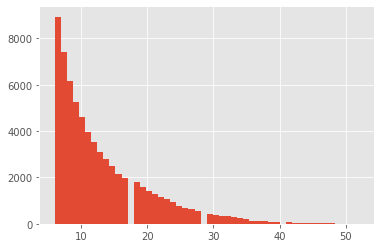

In [34]:
plt.hist([len(s.split(" ")) for s in train_data.Phrase.values if len(s.split(" "))>5], bins=50)
plt.show()

In [35]:
train_data

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
...,...,...
156055,Hearst 's,2
156056,forced avuncular chortles,1
156057,avuncular chortles,3
156058,avuncular,2


In [27]:
word2idx = {w: i for i, w in enumerate(corpus)}

In [32]:
word2idx["escapad"]

3030

In [114]:
labels2=[]
for s in train_data.Sentiment:
    output=np.zeros((5,),dtype=np.int8)
    output[s]=1
    labels2.append(output)

In [135]:
from tensorflow.keras.utils import to_categorical

In [137]:
y = [to_categorical(i, num_classes=5) for i in train_data.Sentiment]

In [121]:
print(len(labels2))
print(len(training2))
print(len(X_train))
print(len(y_train))

126131
126131
100904
100904


In [138]:
X_train , X_test , y_train , y_test = train_test_split(training2,y,test_size=0.2,shuffle=False)

In [99]:
X=[]
for x in X_train:
    X.append(np.asarray(x).astype('float32'))
X=np.asarray(X)

C:\Users\newgh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [140]:
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)

In [141]:
X_train.shape

(100904, 35)

In [142]:
X_train[0].shape

(35,)

In [196]:
model = tf.keras.models.Sequential([
    layers.Embedding(input_dim=n_words, output_dim=128, input_length=max_len),
    layers.LSTM(units=128, recurrent_dropout=0),
    layers.Dense(5, activation="softmax"),
])

In [197]:
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 35, 128)           1333376   
                                                                 
 lstm_29 (LSTM)              (None, 128)               131584    
                                                                 
 dense_34 (Dense)            (None, 5)                 645       
                                                                 
Total params: 1,465,605
Trainable params: 1,465,605
Non-trainable params: 0
_________________________________________________________________
None


In [205]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
metric = tf.keras.metrics.Recall() 
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=metric)

In [206]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
3154/3154 [==============================] - 61s 18ms/step - loss: 0.8417 - recall_2: 0.5767
Epoch 2/10
3154/3154 [==============================] - 53s 17ms/step - loss: 0.8206 - recall_2: 0.5918
Epoch 3/10
3154/3154 [==============================] - 55s 17ms/step - loss: 0.8081 - recall_2: 0.6013
Epoch 4/10
3154/3154 [==============================] - 47s 15ms/step - loss: 0.8002 - recall_2: 0.6080
Epoch 5/10
3154/3154 [==============================] - 49s 16ms/step - loss: 0.7931 - recall_2: 0.6136
Epoch 6/10
3154/3154 [==============================] - 51s 16ms/step - loss: 0.7872 - recall_2: 0.6178
Epoch 7/10
3154/3154 [==============================] - 49s 15ms/step - loss: 0.7830 - recall_2: 0.6215
Epoch 8/10
3154/3154 [==============================] - 46s 15ms/step - loss: 0.7776 - recall_2: 0.6247
Epoch 9/10
3154/3154 [==============================] - 41s 13ms/step - loss: 0.7731 - recall_2: 0.6275
Epoch 10/10
3154/3154 [==============================] - 41s 13m

well that's enough